In [19]:
!pip install tensorflow opencv-python matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [ ]:
# Constants
IMAGE_HEIGHT, IMAGE_WIDTH = 128, 128  # Resize images to this size
BATCH_SIZE = 32
EPOCHS = 20
DATA_DIR = r'./dataset'  # Relative path to dataset

In [ ]:
# Load and preprocess the dataset
def load_data(data_dir):
    images = []
    labels = []
    
    # Assuming five classes: Healthy, Mild Disease, Moderate Disease, Severe Disease, Heart Attack
    class_names = ['Healthy', 'Mild Disease', 'Moderate Disease', 'Severe Disease', 'Heart Attack']
    
    for label in class_names:
        label_dir = os.path.join(data_dir, label)
        for img_name in os.listdir(label_dir):
            img_path = os.path.join(label_dir, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (IMAGE_HEIGHT, IMAGE_WIDTH))
            images.append(img)
            labels.append(class_names.index(label))  # Use index as label
    
    return np.array(images), np.array(labels)

# Load the dataset
images, labels = load_data(DATA_DIR)
images = images.astype('float32') / 255.0  # Normalize pixel values

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [ ]:
# Build a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')  # Five classes for multi-class classification
])

In [ ]:
# Example of compiling a Keras model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - accuracy: 0.2639 - loss: 1.6510 - val_accuracy: 0.3090 - val_loss: 1.5265
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - accuracy: 0.2499 - loss: 1.5771 - val_accuracy: 0.3315 - val_loss: 1.5140
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - accuracy: 0.2909 - loss: 1.5278 - val_accuracy: 0.2921 - val_loss: 1.5283
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.2981 - loss: 1.5525 - val_accuracy: 0.3146 - val_loss: 1.5013
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.2864 - loss: 1.5477 - val_accuracy: 0.3427 - val_loss: 1.4884
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - accuracy: 0.2914 - loss: 1.5220 - val_accuracy: 0.2809 - val_loss: 1.5057
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.3284 - loss: 1.5044 - val_accuracy: 0.2809 - val_loss: 1.5276
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.3054 - loss: 1.5120 - val_accuracy: 0.

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.4504 - loss: 1.2432 - val_accuracy: 0.2472 - val_loss: 1.6386
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.5007 - loss: 1.1704 - val_accuracy: 0.2584 - val_loss: 1.8320
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.5281 - loss: 1.0590 - val_accuracy: 0.2697 - val_loss: 1.8493
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.5371 - loss: 1.1343 - val_accuracy: 0.2697 - val_loss: 1.7330
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.5359 - loss: 1.0534 - val_accuracy: 0.2584 - val_loss: 1.8257
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.6352 - loss: 0.9070 - val_accuracy: 0.3315 - val_loss: 1.9209
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.6056 - loss: 0.8774 - val_accuracy: 0.2360 - val_loss: 2.1931
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.7195 - loss: 0.7412 - val_accuracy: 0.

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2616 - loss: 6.2140
Test accuracy: 53.27%


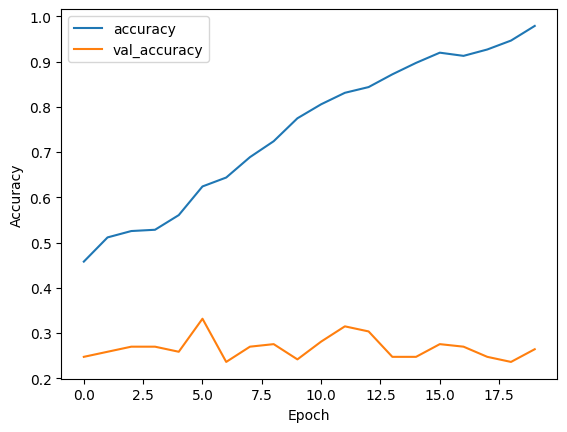

In [ ]:
# Visualize training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Save the model
model.save('./models/heart_attack_detection_model.h5')  # Save model in relative models folder